# Project 2

## Read in the data
URL of the dataset:
1. Electric Vehicle Population Size History By County: https://catalog.data.gov/dataset/electric-vehicle-population-size-history-by-county
2. Electric Vehicle Charging Ports: https://driveelectric.gov/stations

## Purpose of the project
- I would like to explore the relationship between the electric vehicle population and the number of electric vehicle charging ports

In [4]:
import pandas as pd
ev = pd.read_csv('/Users/linali/Desktop/24 Fall/Computing in Context/Project 2/Electric_Vehicle_Population_Size_History_By_County.csv')
charging_ports = pd.read_csv('/Users/linali/Desktop/24 Fall/Computing in Context/Project 2/alt_fuel_stations_ev_charging_units (Nov 17 2024).csv')
charging_ports.info()
ev.info()

/var/folders/3t/2_s7ggxx7kx3z_1z7rt_t0dm0000gn/T/ipykernel_24961/1309210612.py:3: DtypeWarning: Columns (3,6,10,12,13,20,29,31,45,46,47,54,63,64,69,72,74) have mixed types. Specify dtype option on import or set low_memory=False.
  charging_ports = pd.read_csv('/Users/linali/Desktop/24 Fall/Computing in Context/Project 2/alt_fuel_stations_ev_charging_units (Nov 17 2024).csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198796 entries, 0 to 198795
Data columns (total 83 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Fuel Type Code                           198796 non-null  object 
 1   Station Name                             198794 non-null  object 
 2   Street Address                           198796 non-null  object 
 3   Intersection Directions                  43236 non-null   object 
 4   City                                     198774 non-null  object 
 5   State                                    198796 non-null  object 
 6   ZIP                                      198796 non-null  object 
 7   Plus4                                    0 non-null       float64
 8   Station Phone                            196952 non-null  object 
 9   Status Code                              198796 non-null  object 
 10  Expected Date                   

In [5]:
#delete unnecessary columns
charging_ports = charging_ports[['Station Name', 'Open Date']]
charging_ports.head()

,Station Name,Open Date
0,Los Angeles Convention Center,1995-08-30
1,Los Angeles Convention Center,1995-08-30
2,Los Angeles Convention Center,1995-08-30
3,Los Angeles Convention Center,1995-08-30
4,Los Angeles Convention Center,1995-08-30


In [6]:
# extract year from 'Open Date' - Charging ports
charging_ports['Open Date'] = pd.to_datetime(charging_ports['Open Date'])
charging_ports['Open Year'] = charging_ports['Open Date'].dt.year
charging_ports = charging_ports.dropna()
charging_ports['Open Year'] = charging_ports['Open Year'].astype(int)
charging_ports.head()

,Station Name,Open Date,Open Year
0,Los Angeles Convention Center,1995-08-30,1995
1,Los Angeles Convention Center,1995-08-30,1995
2,Los Angeles Convention Center,1995-08-30,1995
3,Los Angeles Convention Center,1995-08-30,1995
4,Los Angeles Convention Center,1995-08-30,1995


In [7]:
#group by year - Charging Ports
charging_ports_by_year = charging_ports.groupby('Open Year').size().reset_index(name = 'Charging Ports by Year')
charging_ports_by_year['Cumulative Ports'] = charging_ports_by_year['Charging Ports by Year'].cumsum()
charging_ports_by_year['Charging Ports Growth Rate (%)'] = charging_ports_by_year['Cumulative Ports'].pct_change()*100
charging_ports_by_year['Charging Ports Growth Rate (%)'] = charging_ports_by_year['Charging Ports Growth Rate (%)'].round(2)
charging_ports_by_year

,Open Year,Charging Ports by Year,Cumulative Ports,Charging Ports Growth Rate (%)
0,1995,7,7,NaN
1,1997,26,33,371.43
2,1998,34,67,103.03
3,1999,5,72,7.46
4,2000,8,80,11.11
5,2002,47,127,58.75
6,2004,41,168,32.28
7,2005,10,178,5.95
8,2006,6,184,3.37
9,2008,44,228,23.91


In [8]:
#group by year - EV
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23439 entries, 0 to 23438
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      23439 non-null  object 
 1   County                                    23346 non-null  object 
 2   State                                     23346 non-null  object 
 3   Vehicle Primary Use                       23439 non-null  object 
 4   Battery Electric Vehicles (BEVs)          23439 non-null  int64  
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  23439 non-null  int64  
 6   Electric Vehicle (EV) Total               23439 non-null  int64  
 7   Non-Electric Vehicle Total                23439 non-null  int64  
 8   Total Vehicles                            23439 non-null  int64  
 9   Percent Electric Vehicles                 23439 non-null  float64
dtypes: float64(1), int64(5), object(4)

In [9]:
#extract year from 'Date' - EV
ev['Date'] = pd.to_datetime(ev['Date'])
ev['Year'] = ev['Date'].dt.year
ev.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Year
0,2024-06-30,Caddo,LA,Passenger,2,0,2,10,12,16.67,2024
1,2017-12-31,Pend Oreille,WA,Truck,0,0,0,5619,5619,0.00,2017
2,2017-04-30,Lincoln,WA,Truck,0,0,0,4464,4464,0.00,2017
3,2022-02-28,El Paso,CO,Passenger,2,2,4,663,667,0.60,2022
4,2017-01-31,DeKalb,GA,Passenger,1,0,1,92,93,1.08,2017


In [10]:
#group by year - EV
ev_by_year = ev.groupby('Year')['Electric Vehicle (EV) Total'].sum().reset_index(name = 'EV by Year')
ev_by_year['Cumulative EV'] = ev_by_year['EV by Year'].cumsum()
ev_by_year['EV Growth Rate (%)'] = ev_by_year['Cumulative EV'].pct_change() * 100
ev_by_year['EV Growth Rate (%)'] = ev_by_year['EV Growth Rate (%)'].round(2)
ev_by_year

,Year,EV by Year,Cumulative EV,EV Growth Rate (%)
0,2017,304761,304761,NaN
1,2018,416663,721424,136.72
2,2019,577998,1299422,80.12
3,2020,715915,2015337,55.09
4,2021,914934,2930271,45.40
5,2022,1214795,4145066,41.46
6,2023,1708290,5853356,41.21
7,2024,1704948,7558304,29.13


## Merge Datasets

In [12]:
#Merge Datasets
df = pd.merge(ev_by_year, charging_ports_by_year, how = 'inner', left_on = 'Year', right_on = 'Open Year')
df = df.drop(['Open Year'],axis = 1)
df = df.dropna()
df

,Year,EV by Year,Cumulative EV,EV Growth Rate (%),Charging Ports by Year,Cumulative Ports,Charging Ports Growth Rate (%)
1,2018,416663,721424,136.72,10043,33843,42.20
2,2019,577998,1299422,80.12,10759,44602,31.79
3,2020,715915,2015337,55.09,18067,62669,40.51
4,2021,914934,2930271,45.40,35701,98370,56.97
5,2022,1214795,4145066,41.46,30319,128689,30.82
6,2023,1708290,5853356,41.21,35696,164385,27.74
7,2024,1704948,7558304,29.13,31834,196219,19.37


In [13]:
#Calculate the ratio of EV per charging port
df['EV per charging port'] = df['Cumulative EV'] / df['Cumulative Ports']
df['EV per charging port'] = df['EV per charging port'].round(2)
df

,Year,EV by Year,Cumulative EV,EV Growth Rate (%),Charging Ports by Year,Cumulative Ports,Charging Ports Growth Rate (%),EV per charging port
1,2018,416663,721424,136.72,10043,33843,42.20,21.32
2,2019,577998,1299422,80.12,10759,44602,31.79,29.13
3,2020,715915,2015337,55.09,18067,62669,40.51,32.16
4,2021,914934,2930271,45.40,35701,98370,56.97,29.79
5,2022,1214795,4145066,41.46,30319,128689,30.82,32.21
6,2023,1708290,5853356,41.21,35696,164385,27.74,35.61
7,2024,1704948,7558304,29.13,31834,196219,19.37,38.52


## Data Visualization

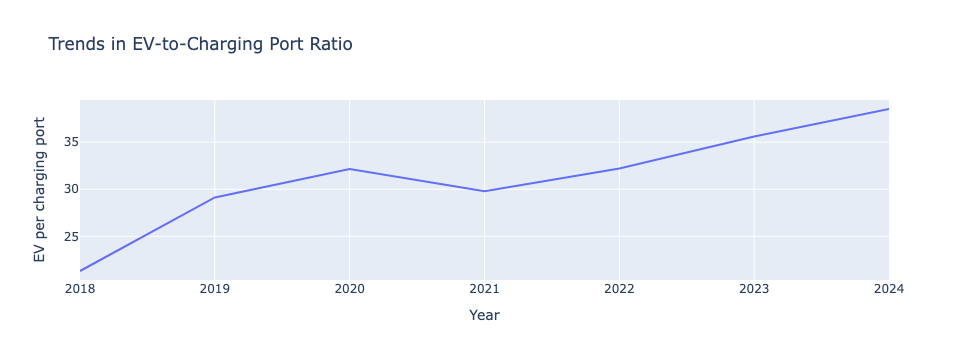

In [15]:
#Trends in EV-to-Charging Port Ratio
import plotly.express as px

import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

px.line(df,x = 'Year', y = 'EV per charging port', title = 'Trends in EV-to-Charging Port Ratio')

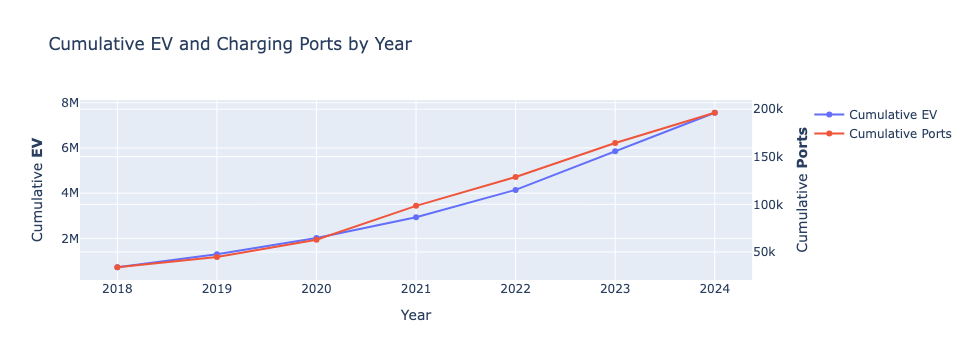

In [16]:
#Trends of Electric Vehicles and Charging Infrastructure amount

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{'secondary_y': True}]])

# Add traces
fig.add_trace(go.Scatter(x = df['Year'], y=df['Cumulative EV'], name='Cumulative EV'),secondary_y=False)
fig.add_trace(go.Scatter(x = df['Year'], y=df['Cumulative Ports'], name='Cumulative Ports'), secondary_y=True)

# Add figure title
fig.update_layout(title = "Cumulative EV and Charging Ports by Year")

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="Cumulative <b>EV</b>", secondary_y=False)
fig.update_yaxes(title_text="Cumulative <b>Ports</b>", secondary_y=True)

fig.show()

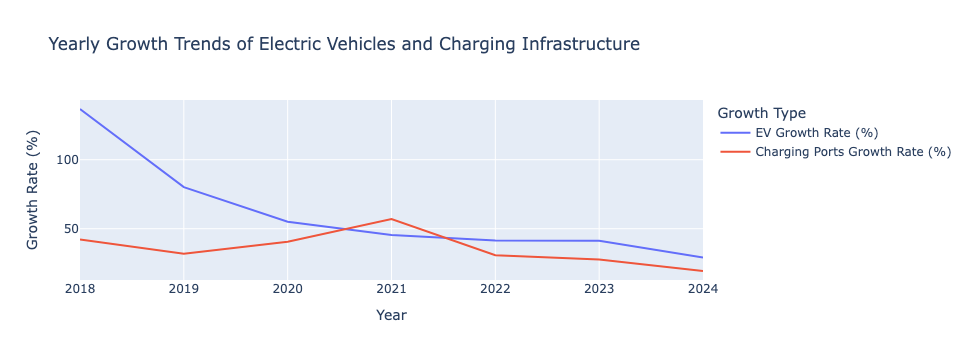

In [17]:
#Yearly Growth Trends of Electric Vehicles and Charging Infrastructure
df_growth = df.melt(id_vars = 'Year', value_vars = ['EV Growth Rate (%)', 'Charging Ports Growth Rate (%)'], var_name = 'Growth Type', value_name = 'Growth Rate (%)')
df_growth
px.line(df_growth,x = 'Year', y = 'Growth Rate (%)', color = 'Growth Type', title = 'Yearly Growth Trends of Electric Vehicles and Charging Infrastructure')

## Takeaways

From the three graphs, we can draw the following conclusions:
- The EV per charging point has increased over time, suggesting that infrastructure development is lagging behind the growth of EVs
- Both EVs and charging infrastructure have experienced significant increases over time
- There is no clear relationship between the yearly growth trends of EVs and charging infrastructure